<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%83%D1%80%D0%BE%D0%B2%D0%BD%D1%8F_NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-9cb148a1f4a5>:127: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


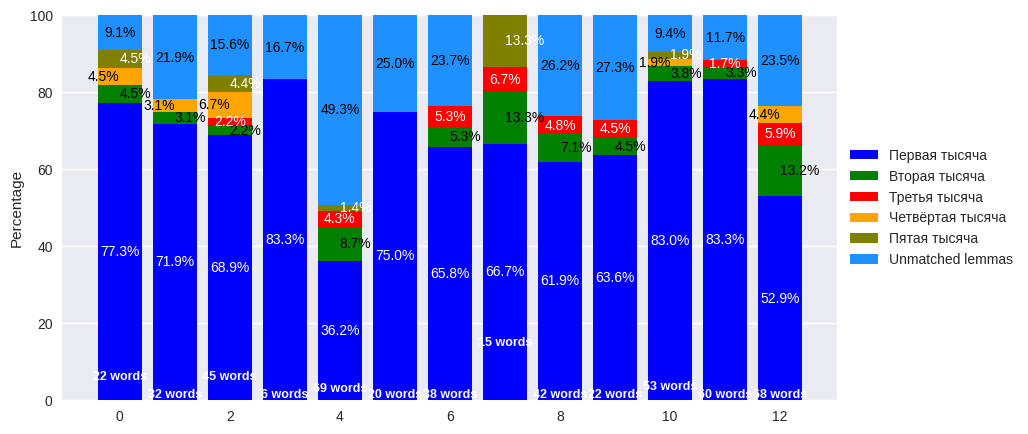

In [5]:
import glob
import os
from pymystem3 import Mystem
import string
import csv
import matplotlib.pyplot as plt
import numpy as np

mystem = Mystem()

#folder path с текстами учеников
students_path = r"/content/Students_texts"
text_contents = {}

#тут будет количество уникальных лемм
x_data = []

for text_path in glob.glob(students_path + "/*.txt"):
    with open(text_path, "r", encoding='utf-8') as file:
        file_name = os.path.basename(text_path) # Ключи тут являются названиями файлов текстов
        text = file.read()
        lemmas = [lemma for lemma in mystem.lemmatize(text) 
                  if lemma.strip() and not all(c in string.punctuation or c.isspace() for c in lemma) # убираем знаки препинания
                  and not any(c.isalpha() and ord(c) < 128 for c in lemma)] # убираем леммы без кириллицы
        lemmas = list(set(lemmas)) # Оставляем только уникальные леммы
        x_data.append(len(lemmas)) # записываем количество уникальных лемм каждого текста
        text_contents[file_name] = lemmas


# Загружаем частотный словарь для каждой тысячи слов
s = open("1-1000_lemmas.txt", "r", encoding='utf-8')
slovar1 = s.read()
slovar1 = slovar1.lower()
slovar1 = slovar1.split("\n")
s.close()

s = open("1001-2000_lemmas.txt", "r", encoding='utf-8')
slovar2 = s.read()
slovar2 = slovar2.lower()
slovar2 = slovar2.split("\n")
s.close()

s = open("2001-3000_lemmas.txt", "r", encoding='utf-8')
slovar3 = s.read()
slovar3 = slovar3.lower()
slovar3 = slovar3.split("\n")
s.close()

s = open("3001-4000_lemmas.txt", "r", encoding='utf-8')
slovar4 = s.read()
slovar4 = slovar4.lower()
slovar4 = slovar4.split("\n")
s.close()

s = open("4001-5000_lemmas.txt", "r", encoding='utf-8')
slovar5 = s.read()
slovar5 = slovar5.lower()
slovar5 = slovar5.split("\n")
s.close()

# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []
y_data_5 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    lv5 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
        if i in slovar5:
            lv5 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)
    y_data_5.append(lv5)

#Unmatched lemmas
y_data_6 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i] - y_data_5[i]
    y_data_6.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph

with open("names_and_numbers.csv", "w") as csvfile: # Записываем в csv файл какая цифра относится к какому файлу
    writer = csv.writer(csvfile)
    writer.writerow(["Name", "Number"])
    for name, number in name_to_number.items():
        writer.writerow([name, number])



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]
percentages_6 = [y / x * 100 for y, x in zip(y_data_6, x_data)]


colors = ['blue', 'green', 'red', 'orange', 'olive', 'dodgerblue']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info, percentages_1, color=colors[0])
plt.bar(info, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])
plt.bar(info, percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4), color=colors[4])
plt.bar(info, percentages_6, bottom=np.add(np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4), percentages_5), color=colors[5])


labels = ['Первая тысяча', 'Вторая тысяча', 'Третья тысяча', 'Четвёртая тысяча', 'Пятая тысяча', 'Unmatched lemmas']

for i, v in enumerate(percentages_5):
    plt.text(i, v, str(x_data[i])+ " words", ha='center', va='bottom', weight='bold', fontsize=9, color = 'white')

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))


for i, p in enumerate(percentages_1):
    if p != 0:
        plt.text(i, p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_2):
    if p != 0:
        plt.text(i, percentages_1[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='black')
for i, p in enumerate(percentages_3):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_4):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + p / 2, f"{p:.1f}%", ha='right', va='center', color='black')
for i, p in enumerate(percentages_5):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + percentages_4[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='white')
for i, p in enumerate(percentages_6):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + percentages_4[i] + percentages_5[i] + p / 2, f"{p:.1f}%", ha='center', va='center', color='black')


plt.xticks()
plt.ylabel('Percentage')
plt.show()

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('lemmas_levels.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
mark1 = "1E"
mark2 = "2I"
mark3 = "3AU"
mark4 = "4S"
ll1 = df.query('level == @mark1')
ll2 = df.query('level == @mark2')
ll3 = df.query('level == @mark3')
ll4 = df.query('level == @mark4')

In [12]:
slovar1 = ll1['lemma'].str.strip('\'').tolist()
slovar2 = ll2['lemma'].str.strip('\'').tolist()
slovar3 = ll3['lemma'].str.strip('\'').tolist()
slovar4 = ll4['lemma'].str.strip('\'').tolist()

<ipython-input-14-2dc0193757a6>:61: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


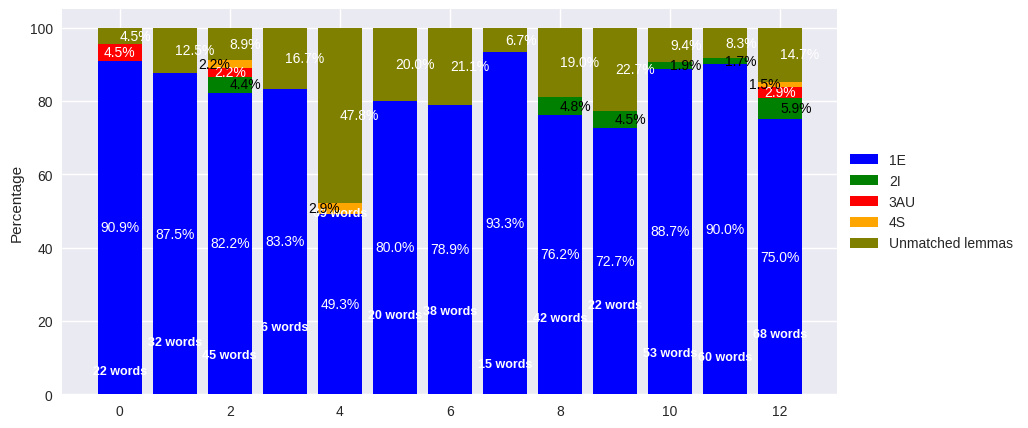

In [14]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph

with open("names_and_numbers.csv", "w") as csvfile: # Записываем в csv файл какая цифра относится к какому файлу
    writer = csv.writer(csvfile)
    writer.writerow(["Name", "Number"])
    for name, number in name_to_number.items():
        writer.writerow([name, number])



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]


colors = ['blue', 'green', 'red', 'orange', 'olive', 'dodgerblue']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info, percentages_1, color=colors[0])
plt.bar(info, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])
plt.bar(info, percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4), color=colors[4])


labels = ['1E', '2I', '3AU', '4S', 'Unmatched lemmas']

for i, v in enumerate(percentages_5):
    plt.text(i, v, str(x_data[i])+ " words", ha='center', va='bottom', weight='bold', fontsize=9, color = 'white')

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))


for i, p in enumerate(percentages_1):
    if p != 0:
        plt.text(i, p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_2):
    if p != 0:
        plt.text(i, percentages_1[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='black')
for i, p in enumerate(percentages_3):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_4):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + p / 2, f"{p:.1f}%", ha='right', va='center', color='black')
for i, p in enumerate(percentages_5):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + percentages_4[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='white')


plt.xticks()
plt.ylabel('Percentage')
plt.show()

In [16]:
df = pd.read_csv('A1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A1 = df[:754]

In [17]:
df = pd.read_csv('A2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A2 = df[:1048]

In [18]:
df = pd.read_csv('B1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B1 = df[:1081]

In [19]:
df = pd.read_csv('B2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B2 = df[:3331]

In [20]:
slovar1 = A1['Lemma'].str.lower().tolist()
slovar2 = A2['Unnamed: 0'].str.lower().tolist()
slovar3 = B1['Lemma'].str.lower().tolist()
slovar4 = B2['Lemma'].str.lower().tolist()

<ipython-input-21-1b80d0282cab>:61: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


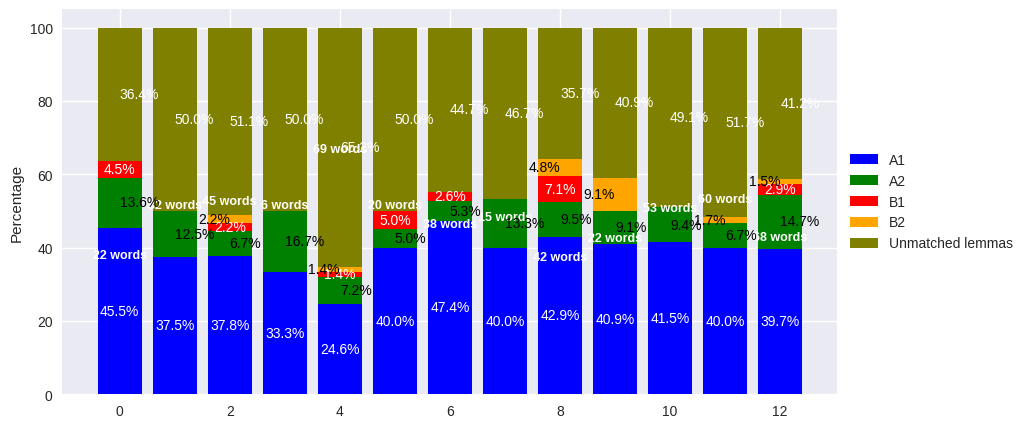

In [21]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph

with open("names_and_numbers.csv", "w") as csvfile: # Записываем в csv файл какая цифра относится к какому файлу
    writer = csv.writer(csvfile)
    writer.writerow(["Name", "Number"])
    for name, number in name_to_number.items():
        writer.writerow([name, number])



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]


colors = ['blue', 'green', 'red', 'orange', 'olive', 'dodgerblue']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info, percentages_1, color=colors[0])
plt.bar(info, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])
plt.bar(info, percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4), color=colors[4])


labels = ['A1', 'A2', 'B1', 'B2', 'Unmatched lemmas']

for i, v in enumerate(percentages_5):
    plt.text(i, v, str(x_data[i])+ " words", ha='center', va='bottom', weight='bold', fontsize=9, color = 'white')

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))


for i, p in enumerate(percentages_1):
    if p != 0:
        plt.text(i, p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_2):
    if p != 0:
        plt.text(i, percentages_1[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='black')
for i, p in enumerate(percentages_3):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_4):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + p / 2, f"{p:.1f}%", ha='right', va='center', color='black')
for i, p in enumerate(percentages_5):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + percentages_4[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='white')


plt.xticks()
plt.ylabel('Percentage')
plt.show()

In [22]:
df = pd.read_csv('new_vocab_a1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv1 = df

In [23]:
df = pd.read_csv('new_vocab_a2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv2 = df

In [24]:
df = pd.read_csv('new_vocab_b1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv3 = df

In [25]:
df = pd.read_csv('new_vocab_b2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv4 = df

In [26]:
slovar1 = nv1['а'].str.lower().tolist()
slovar2 = nv2['а'].str.lower().tolist()
slovar3 = nv3['а'].str.lower().tolist()
slovar4 = nv4['а'].str.lower().tolist()

In [35]:
print(slovar1[:20])
print(slovar2[:20])
print(slovar3[:20])
print(slovar4[:20])

['абстрактный', 'август', 'австралия', 'автобус', 'автор', 'адрес', 'азия', 'активный', 'александр', 'александра', 'алексей', 'алеша', 'алла', 'америка', 'английски', 'английский', 'англичанин', 'англичанка', 'англия', 'англо-русский']
['абстрактный', 'август', 'австралия', 'автобус', 'автор', 'администрация', 'адрес', 'азия', 'активный', 'александр', 'александра', 'алексей', 'алеша', 'алла', 'алфавит', 'алфавитный', 'америка', 'английски', 'английский', 'англичанин']
['абсолютно', 'абстрактный', 'август', 'австралия', 'автобус', 'автобусный', 'автомат', 'автомобиль', 'автор', 'администрация', 'адрес', 'азиатский', 'азия', 'академия', 'активный', 'алгебра', 'александр', 'александра', 'алексей', 'алеша']
['аббревиатура', 'абзац', 'аборт', 'абрикос', 'абсолютно', 'абсолютный', 'абстрактно', 'абстрактный', 'абсурд', 'абсурдный', 'абхаз', 'абхазец', 'абхазка', 'авария', 'август', 'австралиец', 'австралийка', 'австриец', 'австрийка', 'автобиография']


<ipython-input-27-1b80d0282cab>:61: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


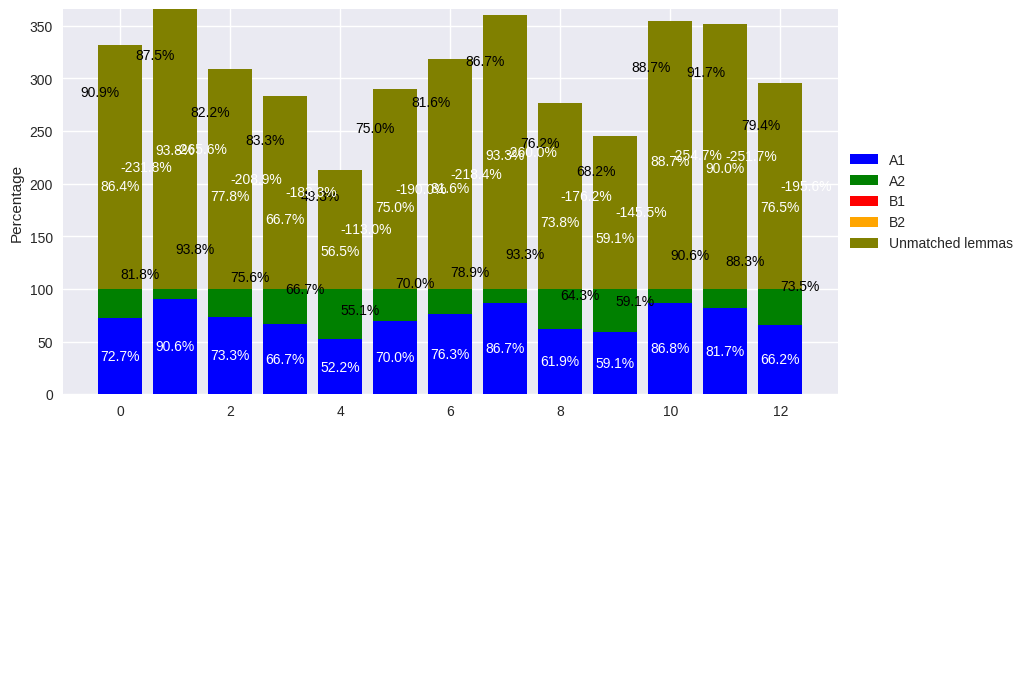

In [27]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph

with open("names_and_numbers.csv", "w") as csvfile: # Записываем в csv файл какая цифра относится к какому файлу
    writer = csv.writer(csvfile)
    writer.writerow(["Name", "Number"])
    for name, number in name_to_number.items():
        writer.writerow([name, number])



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]


colors = ['blue', 'green', 'red', 'orange', 'olive', 'dodgerblue']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info, percentages_1, color=colors[0])
plt.bar(info, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])
plt.bar(info, percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4), color=colors[4])


labels = ['A1', 'A2', 'B1', 'B2', 'Unmatched lemmas']

for i, v in enumerate(percentages_5):
    plt.text(i, v, str(x_data[i])+ " words", ha='center', va='bottom', weight='bold', fontsize=9, color = 'white')

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))


for i, p in enumerate(percentages_1):
    if p != 0:
        plt.text(i, p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_2):
    if p != 0:
        plt.text(i, percentages_1[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='black')
for i, p in enumerate(percentages_3):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + p / 2, f"{p:.1f}%", ha='center', va='center', color='white')
for i, p in enumerate(percentages_4):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + p / 2, f"{p:.1f}%", ha='right', va='center', color='black')
for i, p in enumerate(percentages_5):
    if p != 0:
        plt.text(i, percentages_1[i] + percentages_2[i] + percentages_3[i] + percentages_4[i] + p / 2, f"{p:.1f}%", ha='left', va='center', color='white')


plt.xticks()
plt.ylabel('Percentage')
plt.show()